# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

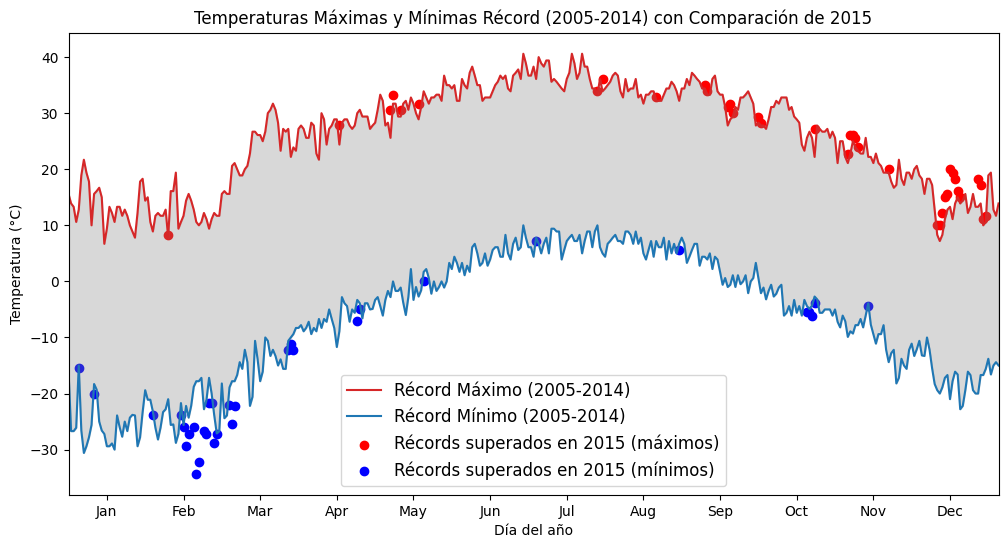

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Dividir los valores por 10 para obtener las temperaturas en grados centígrados
data['Data_Value'] = data['Data_Value'] / 10

# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Crear columnas 'Year' y 'MonthDay' para facilitar el análisis
data['Year'] = data['Date'].dt.year
data['MonthDay'] = data['Date'].dt.strftime('%m-%d')

# Eliminar registros del 29 de febrero (días bisiestos)
data = data[data['MonthDay'] != '02-29']

# Filtrar datos para el período 2005-2014
data_2005_2014 = data[(data['Year'] >= 2005) & (data['Year'] <= 2014)]

# Encontrar las temperaturas máximas y mínimas récord para cada día del año
max_temp_records = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('MonthDay')['Data_Value'].max()
min_temp_records = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('MonthDay')['Data_Value'].min()

# Filtrar datos para el año 2015
data_2015 = data[data['Year'] == 2015]

# Encontrar las temperaturas récord en 2015
max_temp_2015 = data_2015[data_2015['Element'] == 'TMAX'].groupby('MonthDay')['Data_Value'].max()
min_temp_2015 = data_2015[data_2015['Element'] == 'TMIN'].groupby('MonthDay')['Data_Value'].min()

# Encontrar los récords batidos en 2015
record_max_broken = max_temp_2015[max_temp_2015 > max_temp_records]
record_min_broken = min_temp_2015[min_temp_2015 < min_temp_records]

# Crear el gráfico de temperaturas récord
plt.figure(figsize=(12, 6))
plt.plot(max_temp_records.index, max_temp_records, color='tab:red', label='Récord Máximo (2005-2014)')
plt.plot(min_temp_records.index, min_temp_records, color='tab:blue', label='Récord Mínimo (2005-2014)')

# Dibujar los puntos donde se batieron récords en 2015
plt.scatter(record_max_broken.index, record_max_broken, color='red', marker='o', label='Récords superados en 2015 (máximos)')
plt.scatter(record_min_broken.index, record_min_broken, color='blue', marker='o', label='Récords superados en 2015 (mínimos)')

# Rellenar el área entre las temperaturas máximas y mínimas récord
plt.fill_between(max_temp_records.index, max_temp_records, min_temp_records, color='gray', alpha=0.3)

# Configurar el gráfico
plt.title('Temperaturas Máximas y Mínimas Récord (2005-2014) con Comparación de 2015')
plt.xlabel('Día del año')
plt.ylabel('Temperatura (°C)')
plt.legend(loc='upper left')

# Personalizar los ejes x para mostrar los meses
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_positions = [i*30 + 15 for i in range(12)]
plt.xticks(month_positions, months)

# Configurar los límites del eje x para eliminar espacios en blanco
plt.xlim(max_temp_records.index[0], max_temp_records.index[-1])

# Cambiar la ubicación y el tamaño de la tabla de referencias para que no tape el gráfico
plt.legend(loc='lower center', fontsize='large')

# Mostrar el gráfico
plt.show()